# Imports & Merging

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
import os

In [156]:
path = 'csv\\'
files = [file for file in os.listdir(path) if file.endswith(".csv")]

output = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    output.at[file.replace(".csv", "")] = df.shape[0]
output.at["Total"] = output.sum()

In [157]:
output

database0-500            436
database1000-2000        865
database10000-10200      147
database10200-10300       84
database10300-10400       81
                       ...  
database9600-9700         82
database9700-9800         81
database9800-9900         80
database9900-10000        77
Total                  52422
Name: Rows, Length: 359, dtype: int64

In [260]:
import warnings
warnings.filterwarnings('ignore') # to ignore a deprecated method warning
result = Path('csv\\').glob('*.csv')
csvfiles = sorted(result, key = lambda x: [int(k) if k.isdigit() else k for k in re.split('([0-9]+)', x.stem)])

df = pd.DataFrame()
for files in csvfiles:
    df = df.append(pd.read_csv(files))
df.to_csv('main.csv')

In [259]:
df

,URL,Green Hosting,Bytes,Cleaner Than %,Stats_Adjusted Bytes,Stats_Energy,Stats_CO2_Grid_Grams,Stats_CO2_Grid_Litres,Stats_CO2_Renewable_Grams,Stats_CO2_Renewable_Litres
https://www.google.com/,True,170821,0.96,128969.855,0.000097,0.043003,0.023918,0.037282,0.020736,1651677726
https://www.youtube.com/,True,3543405,0.32,2675270.775,0.002018,0.892021,0.496142,0.773354,0.430140,1651668187
https://www.facebook.com/,True,435816,0.91,329041.080,0.000248,0.109713,0.061022,0.095118,0.052904,1651677735
https://www.netflix.com/fr-en/,True,2004776,0.54,1513605.880,0.001142,0.504685,0.280706,0.437546,0.243363,1651677748
https://www.microsoft.com/fr-fr/,unknown,768548,0.80,580253.740,0.000438,0.193475,0.107611,0.167737,0.093295,1651677764
...,...,...,...,...,...,...,...,...,...,...
https://www.lautre.net/,unknown,219001,0.95,165345.755,0.000125,0.055132,0.030664,0.047797,0.026585,1653036701
https://broncosports.com/,unknown,10939330,0.07,8259194.150,0.006230,2.753881,1.531708,2.387527,1.327943,1653036652
http://aqdyge.com/,True,1433363,0.66,1082189.065,0.000816,0.360837,0.200697,0.312834,0.173998,1653036675
https://www.mcnallyinstitute.com/,True,2747765,0.42,2074562.575,0.001565,0.691726,0.384738,0.599704,0.333556,1653036683


In [160]:
df = pd.read_csv('main.csv', index_col=None)

# Editing

In [161]:
df.columns = ['URL', 'Green Hosting', 'Bytes', 'Cleaner Than %', "Statistics: Adjusted Bytes", "Statistics: Energy (KWG)", "Statistics: CO2 Grams, Grid", "Statistics: CO2 Litres, Grid", "Statistics: CO2 Grams, Renewable", "Statistics: CO2 Litres, Renewable", "Gathered At:"]

In [162]:
df = df.drop_duplicates(subset=['URL'], keep='first')

In [163]:
df.isna().sum()

URL                                  0
Green Hosting                        0
Bytes                                0
Cleaner Than %                       0
Statistics: Adjusted Bytes           0
Statistics: Energy (KWG)             0
Statistics: CO2 Grams, Grid          0
Statistics: CO2 Litres, Grid         0
Statistics: CO2 Grams, Renewable     0
Statistics: CO2 Litres, Renewable    0
Gathered At:                         0
dtype: int64

In [164]:
df["Cleaner Than %"] = df["Cleaner Than %"].apply(lambda x: x*100)

In [165]:
df["Gathered At:"] = pd.to_datetime(df['Gathered At:'], unit='s')

In [166]:
df["Green Hosting"] = np.where(df["Green Hosting"] == "unknown", 'False', 'True')

In [167]:
df.to_csv('main.csv')

In [168]:
# dfm = df.sort_values(by=['Bytes'], ascending=False)

# Analysis

In [169]:
df["Green Hosting"].value_counts()

False    25708
True     24326
Name: Green Hosting, dtype: int64

In [170]:
df.describe()

,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable"
count,5.003400e+04,50034.000000,5.003400e+04,5.003400e+04,50034.000000,50034.000000,50034.000000,50034.000000
mean,3.696112e+06,49.154275,2.790564e+06,2.105122e-03,0.930464,0.517524,0.806683,0.448677
std,5.847474e+06,28.671194,4.414843e+06,3.330431e-03,1.472050,0.818754,1.276221,0.709834
min,1.680000e+02,0.000000,1.268400e+02,9.568445e-08,0.000042,0.000024,0.000037,0.000020
25%,1.055308e+06,25.000000,7.967572e+05,6.010507e-04,0.265664,0.147763,0.230323,0.128105
50%,2.236138e+06,46.000000,1.688285e+06,1.273593e-03,0.562928,0.313101,0.488041,0.271448
75%,4.229322e+06,73.000000,3.193138e+06,2.408812e-03,1.064695,0.592183,0.923057,0.513404
max,3.040842e+08,100.000000,2.295836e+08,1.731912e-01,76.550528,42.577404,66.366883,36.913260


In [195]:
df.sum()

URL                                  https://www.google.com/https://www.youtube.com...
Green Hosting                        TrueTrueTrueTrueFalseTrueFalseFalseFalseFalseF...
Bytes                                                                     184931250547
Cleaner Than %                                                               2459385.0
Statistics: Adjusted Bytes                                         139623094162.984985
Statistics: Energy (KWG)                                                    105.327653
Statistics: CO2 Grams, Grid                                               46554.822635
Statistics: CO2 Litres, Grid                                               25893.79235
Statistics: CO2 Grams, Renewable                                          40361.556638
Statistics: CO2 Litres, Renewable                                         22449.097802
dtype: object

In [199]:
max = df["Statistics: Adjusted Bytes"].max()
df[df["Statistics: Adjusted Bytes"] == max]

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
41527,https://lematin.ma/,True,304084175,0.0,2.295836e+08,0.173191,76.550528,42.577404,66.366883,36.91326,2022-05-15 12:40:01


In [200]:
min = df["Statistics: Adjusted Bytes"].min()
df[df["Statistics: Adjusted Bytes"] == min]

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
40633,https://bloog.pl/,False,168,100.0,126.84,9.568445e-08,0.000042,0.000024,0.000037,0.00002,2022-05-15 10:05:15


In [178]:
dfmax = df.sort_values(['Bytes'], ascending=False).groupby('Bytes').tail(2)
dfmin = df.sort_values(['Bytes'], ascending=True).groupby('Bytes').tail(2)

In [201]:
dfmax.head(10)

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
41527,https://lematin.ma/,True,304084175,0.0,2.295836e+08,0.173191,76.550528,42.577404,66.366883,36.913260,2022-05-15 12:40:01
40959,https://porno-island.site/,True,221431538,0.0,1.671808e+08,0.126116,55.743450,31.004507,48.327806,26.879926,2022-05-15 10:19:45
36484,https://warnerbrosgames.com/,False,174746287,0.0,1.319334e+08,0.099527,43.990847,24.467709,38.138671,21.212729,2022-05-14 10:05:08
39068,https://www.cuntempire.com/,False,173488420,0.0,1.309838e+08,0.098810,43.674190,24.291585,37.864140,21.060034,2022-05-14 13:04:43
18209,https://www.ittefaq.com.bd/,True,158429770,0.0,1.196145e+08,0.090234,39.883307,22.183095,34.577564,19.232041,2022-05-06 14:01:03
20720,https://vnexplorer.net/,False,153772730,0.0,1.160984e+08,0.087581,38.710938,21.531024,33.561157,18.666716,2022-05-06 19:19:45
22691,https://www.xdraco.com/,False,144149539,0.0,1.088329e+08,0.082100,36.288384,20.183599,31.460879,17.498541,2022-05-07 09:09:13
43628,https://www.mbs1179.com/,False,131234648,0.0,9.908216e+07,0.074745,33.037173,18.375276,28.642183,15.930782,2022-05-17 09:41:45
2593,https://2m.ma/ar,True,110049081,1.0,8.308706e+07,0.062678,27.703892,15.408905,24.018397,13.359032,2022-05-04 17:34:15
47472,https://www.tucao.in/,True,103846179,1.0,7.840387e+07,0.059146,26.142366,14.540384,22.664603,12.606052,2022-05-19 12:00:56


In [202]:
dfmin.head(10)

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
40633,https://bloog.pl/,False,168,100.0,126.840,9.568445e-08,0.000042,0.000024,0.000037,0.000020,2022-05-15 10:05:15
1594,https://cunhua.shop/,False,170,100.0,128.350,9.682355e-08,0.000043,0.000024,0.000037,0.000021,2022-05-04 15:50:50
24137,https://netsecurity.ne.jp/,False,185,100.0,139.675,1.053668e-07,0.000047,0.000026,0.000040,0.000022,2022-05-07 10:45:56
25294,https://sw-themes.com/,False,200,100.0,151.000,1.139101e-07,0.000050,0.000028,0.000044,0.000024,2022-05-10 16:14:31
20385,https://apolloprogram.io/,False,207,100.0,156.285,1.178969e-07,0.000052,0.000029,0.000045,0.000025,2022-05-06 19:17:59
8976,https://wz.cz/,False,209,100.0,157.795,1.190360e-07,0.000053,0.000029,0.000046,0.000025,2022-05-05 11:46:41
23324,https://rnu.tn/,False,209,100.0,157.795,1.190360e-07,0.000053,0.000029,0.000046,0.000025,2022-05-07 09:44:59
49296,https://mywebzi.ir/,False,218,100.0,164.590,1.241620e-07,0.000055,0.000031,0.000048,0.000026,2022-05-20 08:43:11
43849,https://offerstrack.net/,False,227,100.0,171.385,1.292879e-07,0.000057,0.000032,0.000050,0.000028,2022-05-17 10:04:25
11097,https://gooddaywith-captcha.top/,False,230,100.0,173.650,1.309966e-07,0.000058,0.000032,0.000050,0.000028,2022-05-05 17:12:02


# Charts to Use

([<matplotlib.patches.Wedge at 0x190f904fb50>,
 [Text(-0.04771115467761193, 1.0989648064061601, 'False'),
  Text(0.04771125757012248, -1.0989648019391147, 'True')],
 [Text(-0.026024266187788324, 0.5994353489488146, '51.4%'),
  Text(0.026024322310975897, -0.5994353465122443, '48.6%')])

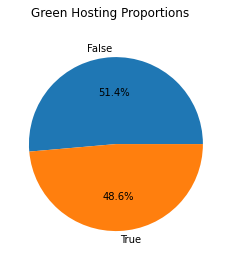

In [209]:
# plt.figure(figsize=(10,10), dpi=300)
plt.suptitle('Green Hosting Proportions', fontsize=12)
plt.pie(df['Green Hosting'].value_counts(), labels=df['Green Hosting'].value_counts().index, autopct='%1.1f%%')

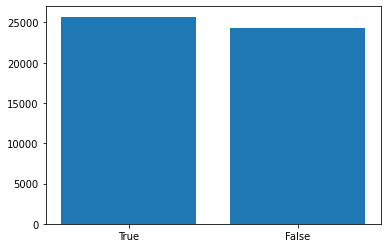

In [234]:
height = df["Green Hosting"].value_counts()
bars = df["Green Hosting"].unique()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

<AxesSubplot:>

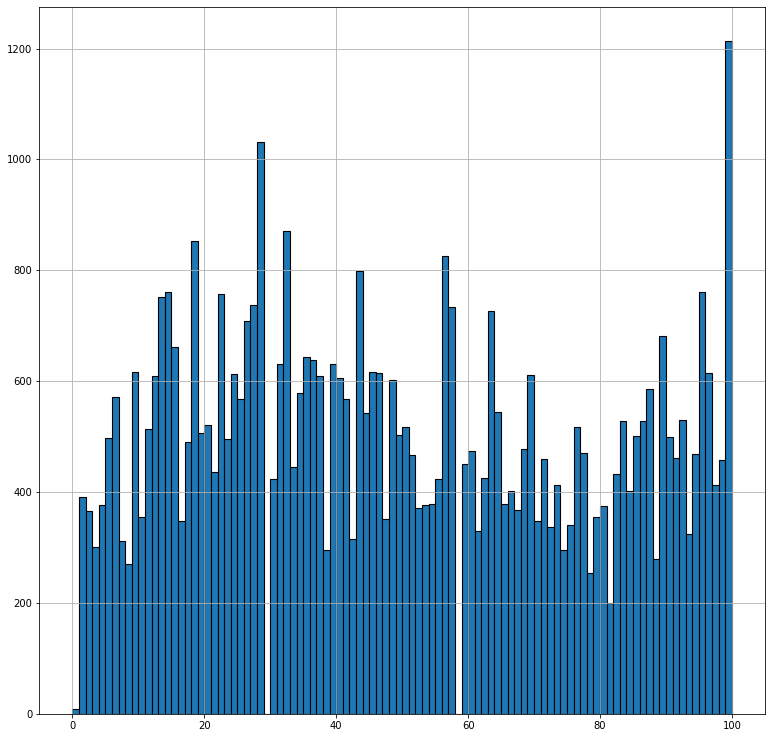

In [254]:
df["Cleaner Than %"].hist(bins=100, edgecolor='black', linewidth=1.1, figsize=(13,13))

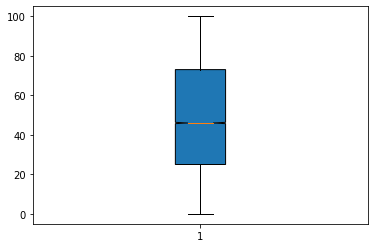

In [255]:
plt.boxplot(df['Cleaner Than %'], notch=True, patch_artist=True)
plt.show()

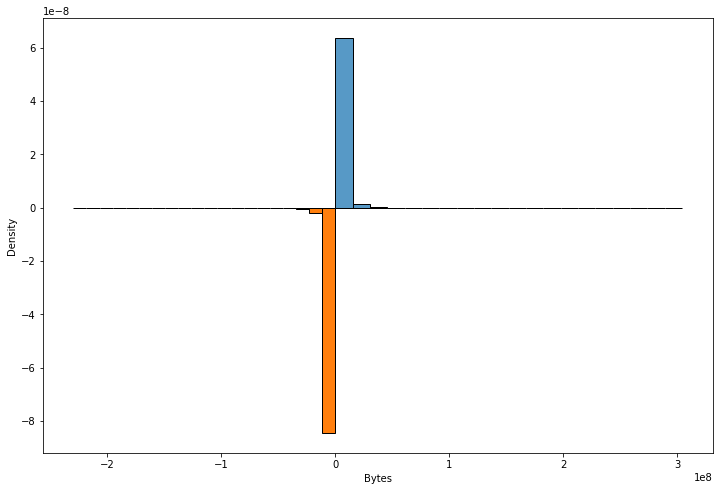

In [257]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot histogram chart for var1
sns.histplot(x=df['Bytes'], stat="density", bins=20, edgecolor='black')

# plot histogram chart for var2
n_bins = 20
# get positions and heights of bars
heights, bins = np.histogram(df["Statistics: Adjusted Bytes"], density=True, bins=n_bins) 
# multiply by -1 to reverse it
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1

# plot
plt.bar(bin_pos, heights, width=bin_width, edgecolor='black')

# show the graph
plt.show()

# Other Charts

<AxesSubplot:>

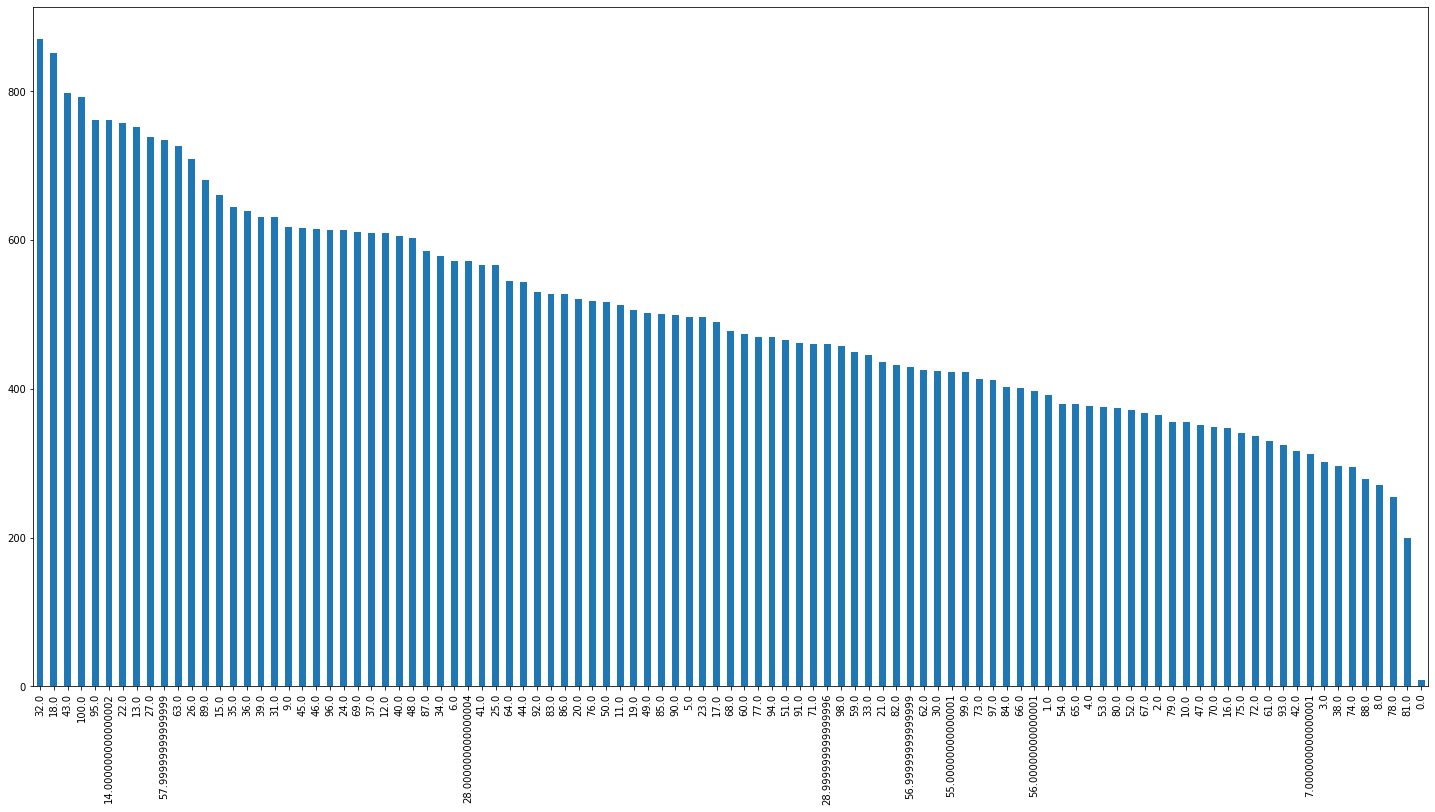

In [243]:
fig, ax = plt.subplots()
df['Cleaner Than %'].value_counts().plot(ax=ax, kind='bar', figsize=(25, 12.5))

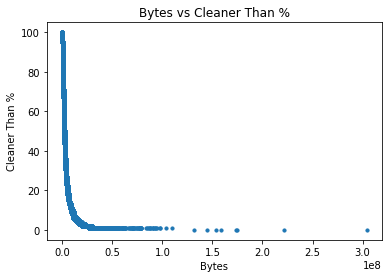

In [203]:
plt.scatter(df["Bytes"], df["Cleaner Than %"], s=10)
plt.title("Bytes vs Cleaner Than %")
plt.xlabel("Bytes")
plt.ylabel("Cleaner Than %")
plt.show()

array([[<AxesSubplot:title={'center':'Bytes'}>,
        <AxesSubplot:title={'center':'Cleaner Than %'}>,
        <AxesSubplot:title={'center':'Statistics: Adjusted Bytes'}>],
       [<AxesSubplot:title={'center':'Statistics: Energy (KWG)'}>,
        <AxesSubplot:title={'center':'Statistics: CO2 Grams, Grid'}>,
        <AxesSubplot:title={'center':'Statistics: CO2 Litres, Grid'}>],
       [<AxesSubplot:title={'center':'Statistics: CO2 Grams, Renewable'}>,
        <AxesSubplot:title={'center':'Statistics: CO2 Litres, Renewable'}>,
        <AxesSubplot:>]], dtype=object)

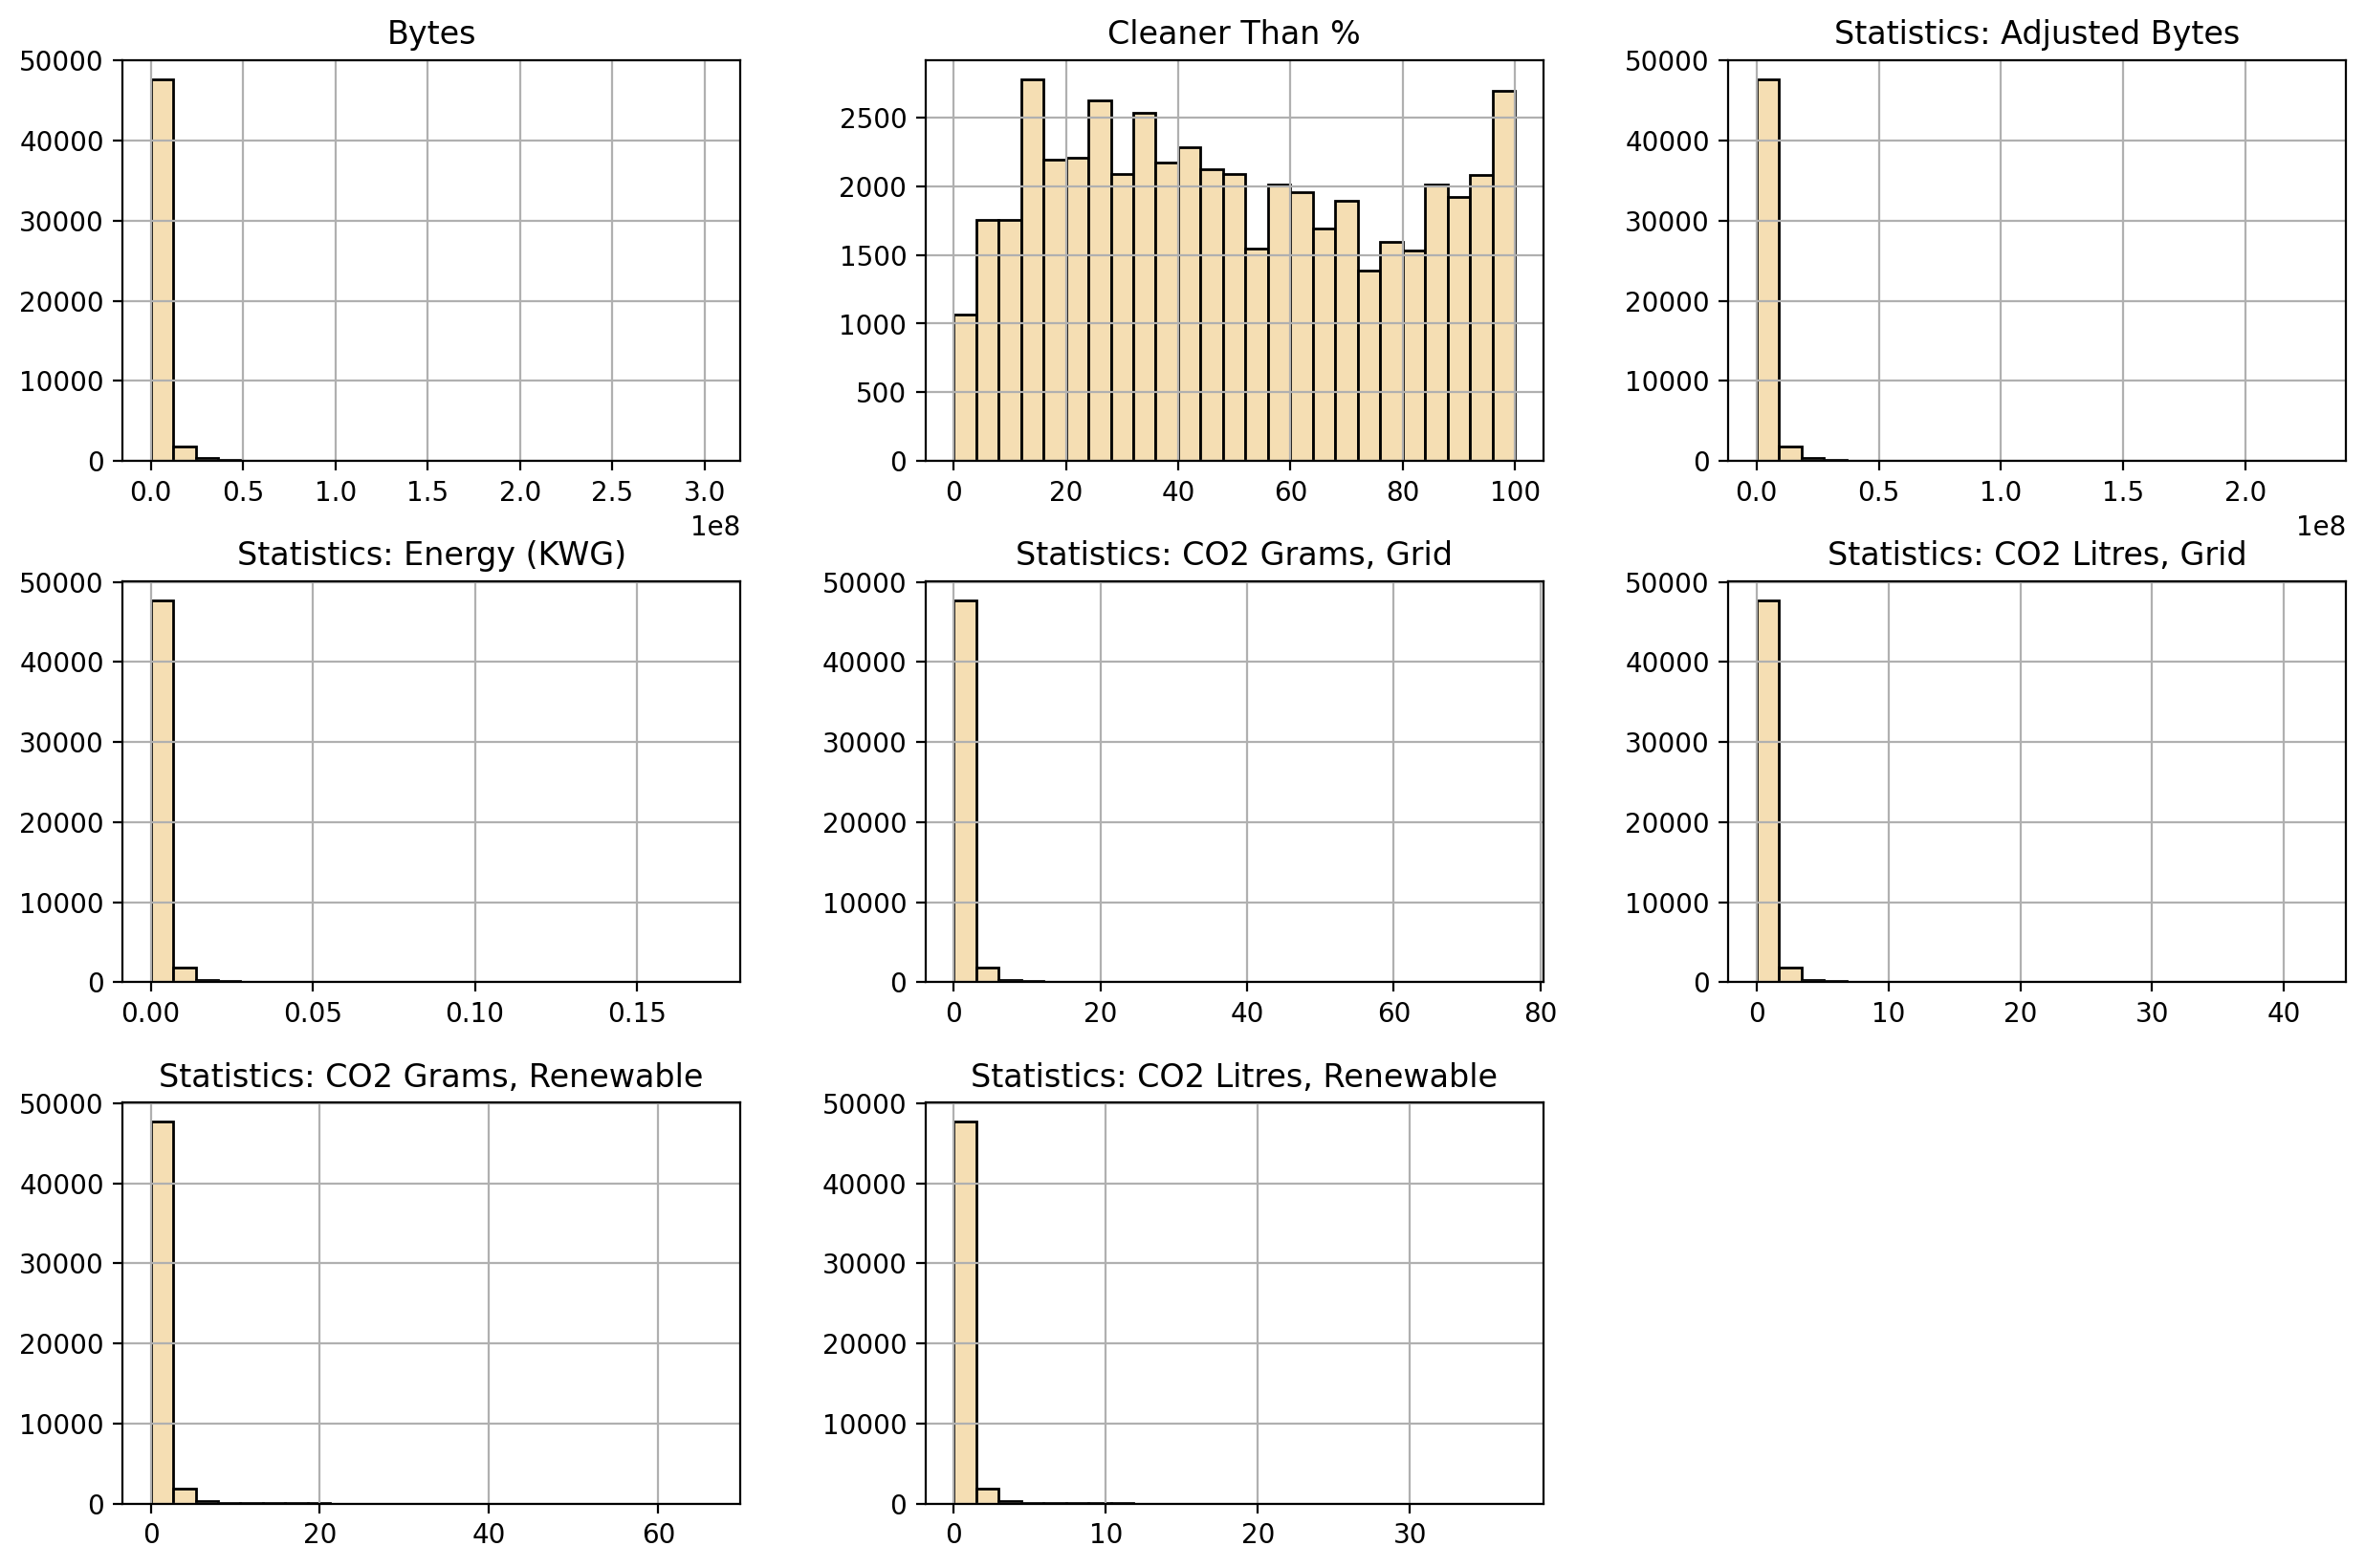

In [186]:
dfchart = df.iloc[:, :10]
fig = plt.figure(figsize=(15, 10), dpi=200)
ax = fig.gca()
dfchart.hist(ax=ax, facecolor='wheat', bins=25, edgecolor='black')

<AxesSubplot:>

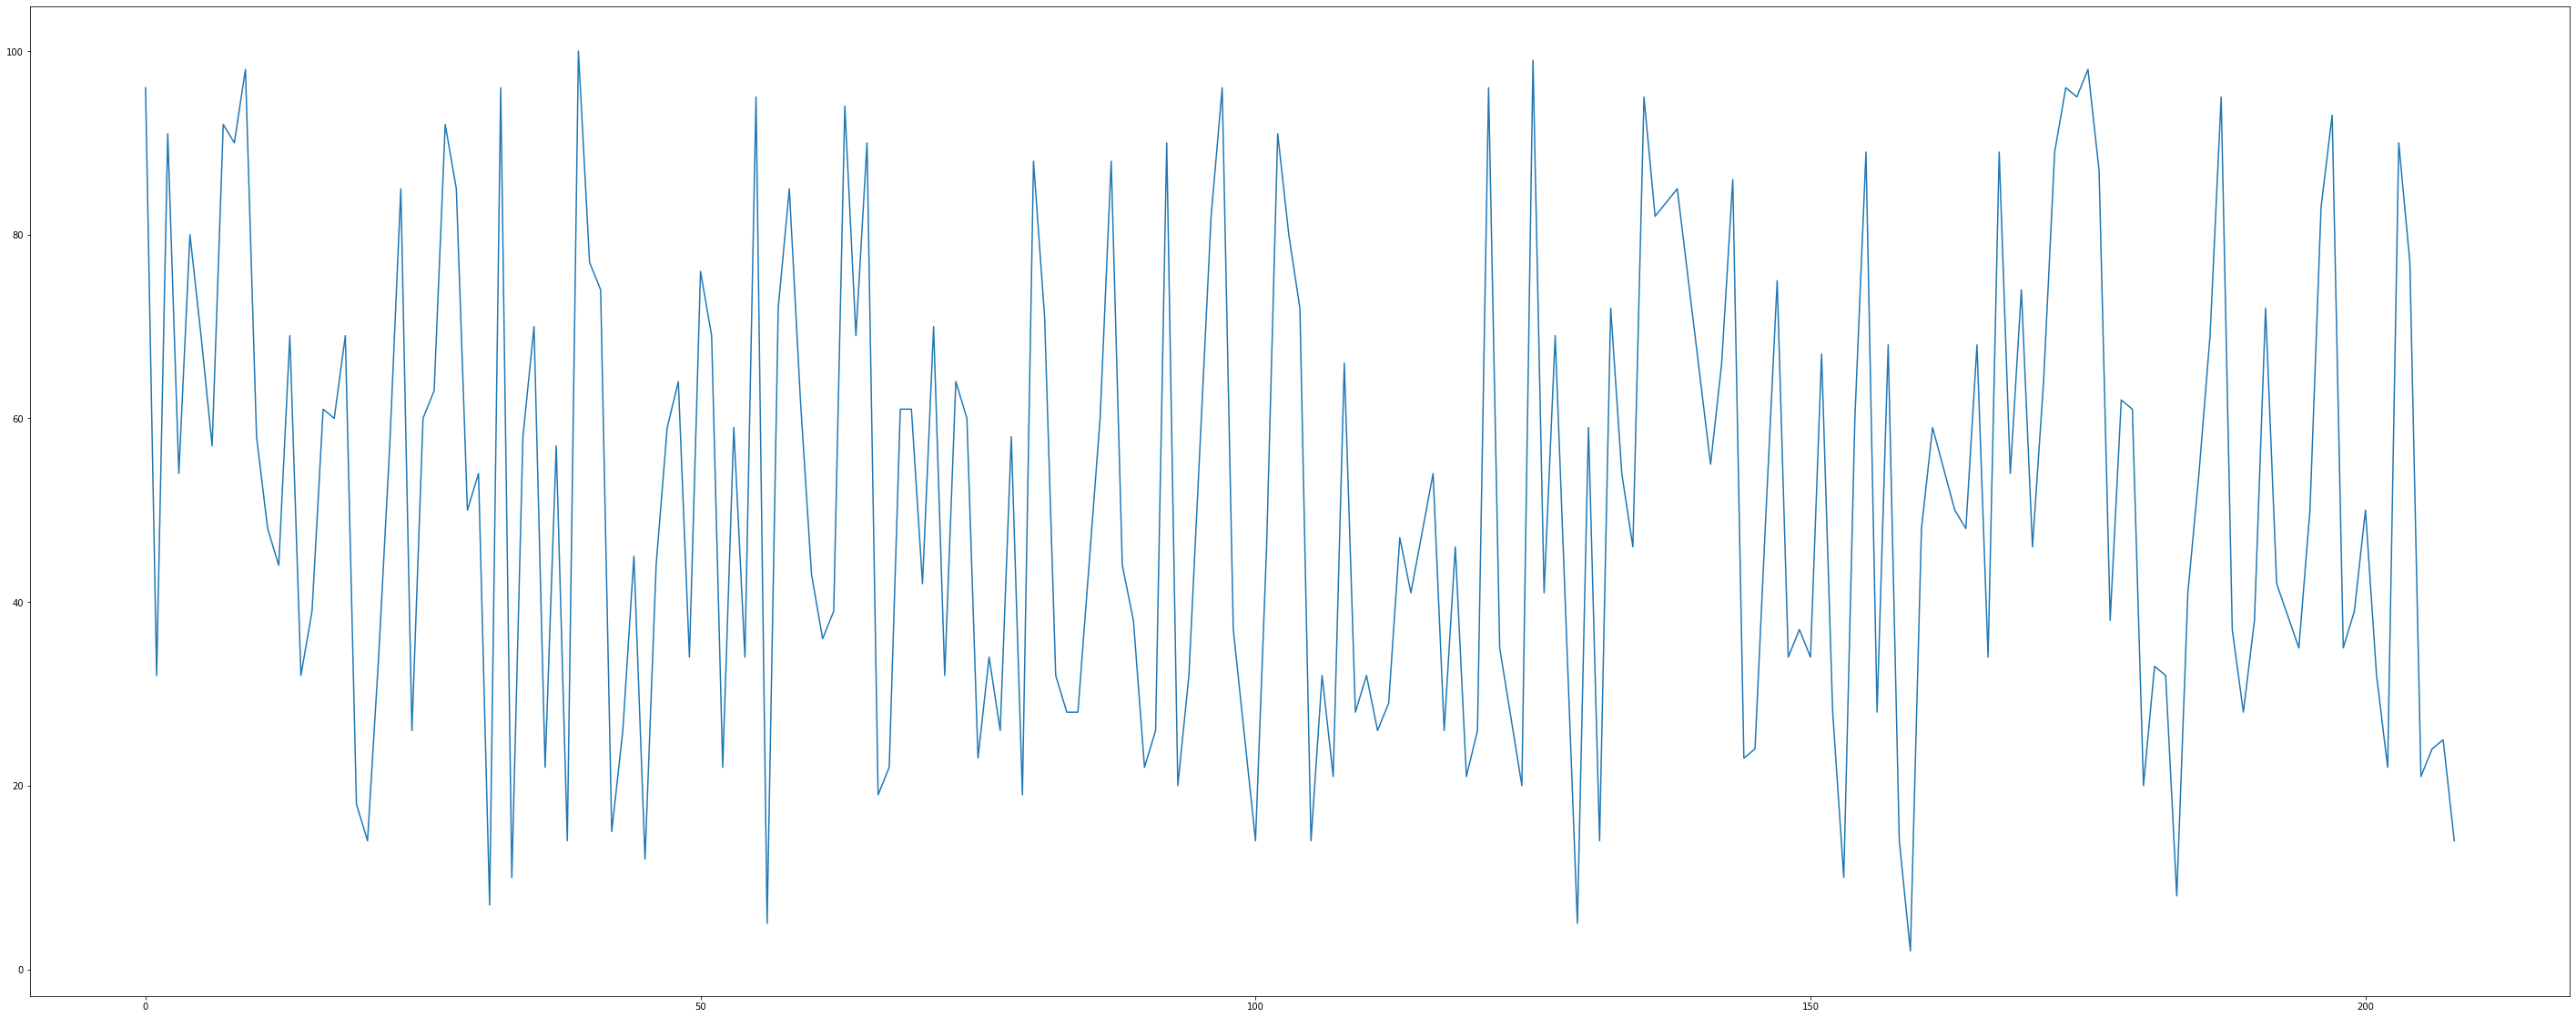

In [188]:
df['Cleaner Than %'][:200].plot.line(figsize=(50, 20))

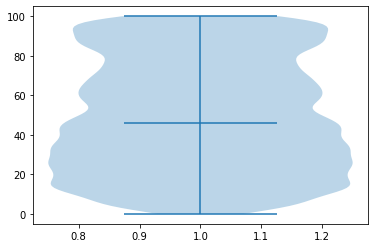

In [190]:
plt.violinplot(df['Cleaner Than %'], showmedians=True)
plt.show()